##  Breast Cancer Prediction using clinical Data
### Breast cancer remains a leading cause of cancer-related mortality among women globally, 
### with an increasing incidence in developing countries where late-stage diagnoses often 
### complicate treatment

#### 1 Importing the neccessary Library

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

import time

import warnings
warnings.filterwarnings('ignore')

####  2. Here I have downloaded the Wisconsin Data set and have stored in my compter for further Analysis. using Pandas Data frame
####  Wisconsin Data set in csv format has been converted into Pandas data frame.

In [7]:
path = "C:\\Users\\ajkumarsingh\\Desktop\\Final_report\\wdbc_data.csv"
dataframe = pd.read_csv(path)

#### 3. Below code  displays the top 5 rows of the DataFrame

In [8]:
dataframe.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

#### 4.  The dataframe.columns attribute in pandas is used to access the column labels of a DataFrame.

In [9]:
dataframe.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#### 5.  Above Data Frame in Point number 3 has one column which has unnamed column, so below code convert that data frame into another date frame ( dataframe1)  which wont't contain unammed column.

In [10]:
dataframe1 = dataframe.drop(['id','Unnamed: 32'], axis = 1)

In [11]:
dataframe1.head()   #  Showing Top 5 data of Data frame dataframe1 

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

#### 6. The  (dataframe1.shape)  attribute in pandas is used to get the dimensions of a DataFrame. Data frame contains total 569 rows and 31 Columns

In [14]:
dataframe1.shape

(569, 31)

#### 7. The dataframe1.info() method in pandas is used to display a concise summary of the DataFrame. It provides essential information about the DataFrame's structure, including the number of rows, columns, data types, non-null counts, and memory usage.

In [15]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#### 8. The dataframe1.describe().T function in pandas is used to generate descriptive statistics of a DataFrame, and the .T (transpose) method is used to transpose the output for better readability, especially when dealing with a large number of features.

In [16]:
dataframe1.describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

#### 9. The code   ( dataframe1.isnull().sum() )  is used in pandas to check for missing (null) values in a DataFrame. It helps you identify which columns have missing data and how many missing values are present in each column, since it has returned 0 for all column it means our data set is not having any null values.

In [17]:
dataframe1.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### 10. The code   ( value_counts = dataframe1['diagnosis'].value_counts() )  is used to count the occurrences of each unique value in the 'diagnosis' column of a DataFrame. This method is particularly useful for understanding the distribution of categorical data in your dataset.

In [18]:
value_counts = dataframe1['diagnosis'].value_counts()
value_counts

diagnosis
B    357
M    212
Name: count, dtype: int64

## 11.  Exploratory Data Analysis (EDA)

### 11.1 Below code creates a visualization of the distribution of the 'diagnosis' column from the DataFrame ( dataframe1) . It uses both a count plot and a pie chart to show the count and distribution of each category in the 'diagnosis' column

#### There are total 357 Benign and 212 Malignant. In percentage terms, Benign is 62.7% and Malignant is 37.3%

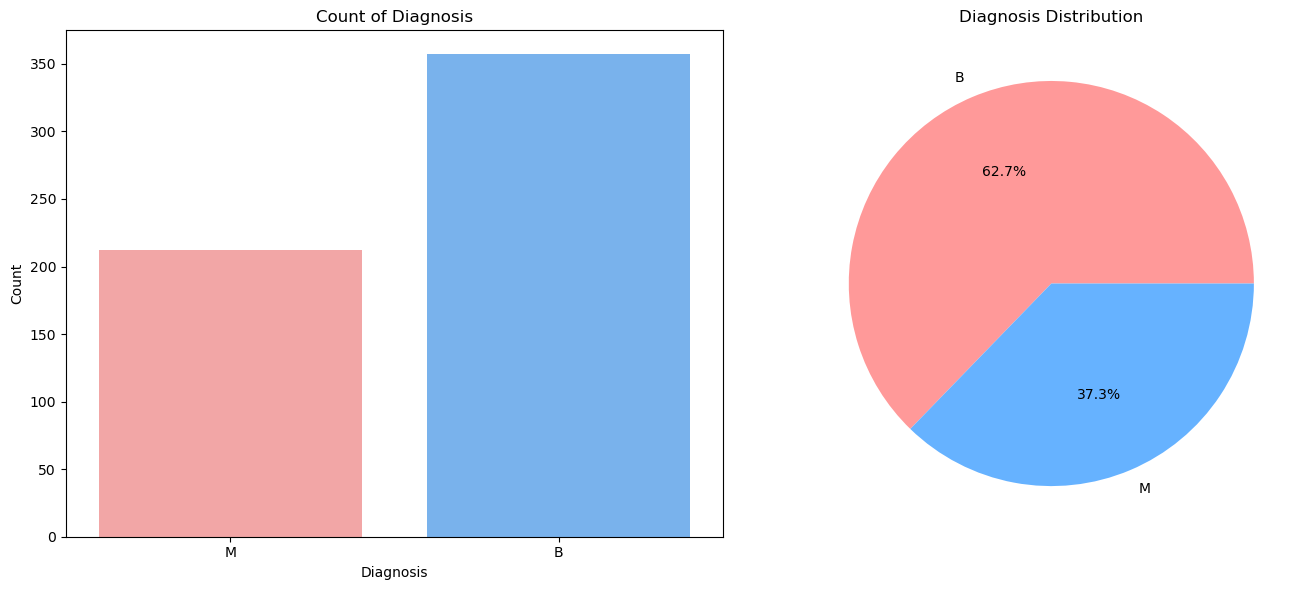

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (14,6))

sns.countplot(data=dataframe1,
             x='diagnosis',
             palette= ['#FF9999', '#66B2FF'],
             ax=ax[0])
ax[0].set_title('Count of Diagnosis')
ax[0].set_xlabel('Diagnosis')
ax[0].set_ylabel('Count')

ax[1].pie(value_counts,
          labels=value_counts.index, 
          autopct='%1.1f%%', 
          colors=sns.color_palette(['#FF9999', '#66B2FF'], len(value_counts)))
ax[1].set_title('Diagnosis Distribution')

plt.tight_layout()
plt.show()

#### 11.2 Below code generates and saves a pairplot of selected features from a DataFrame, with different colors indicating different categories of diagnosis.

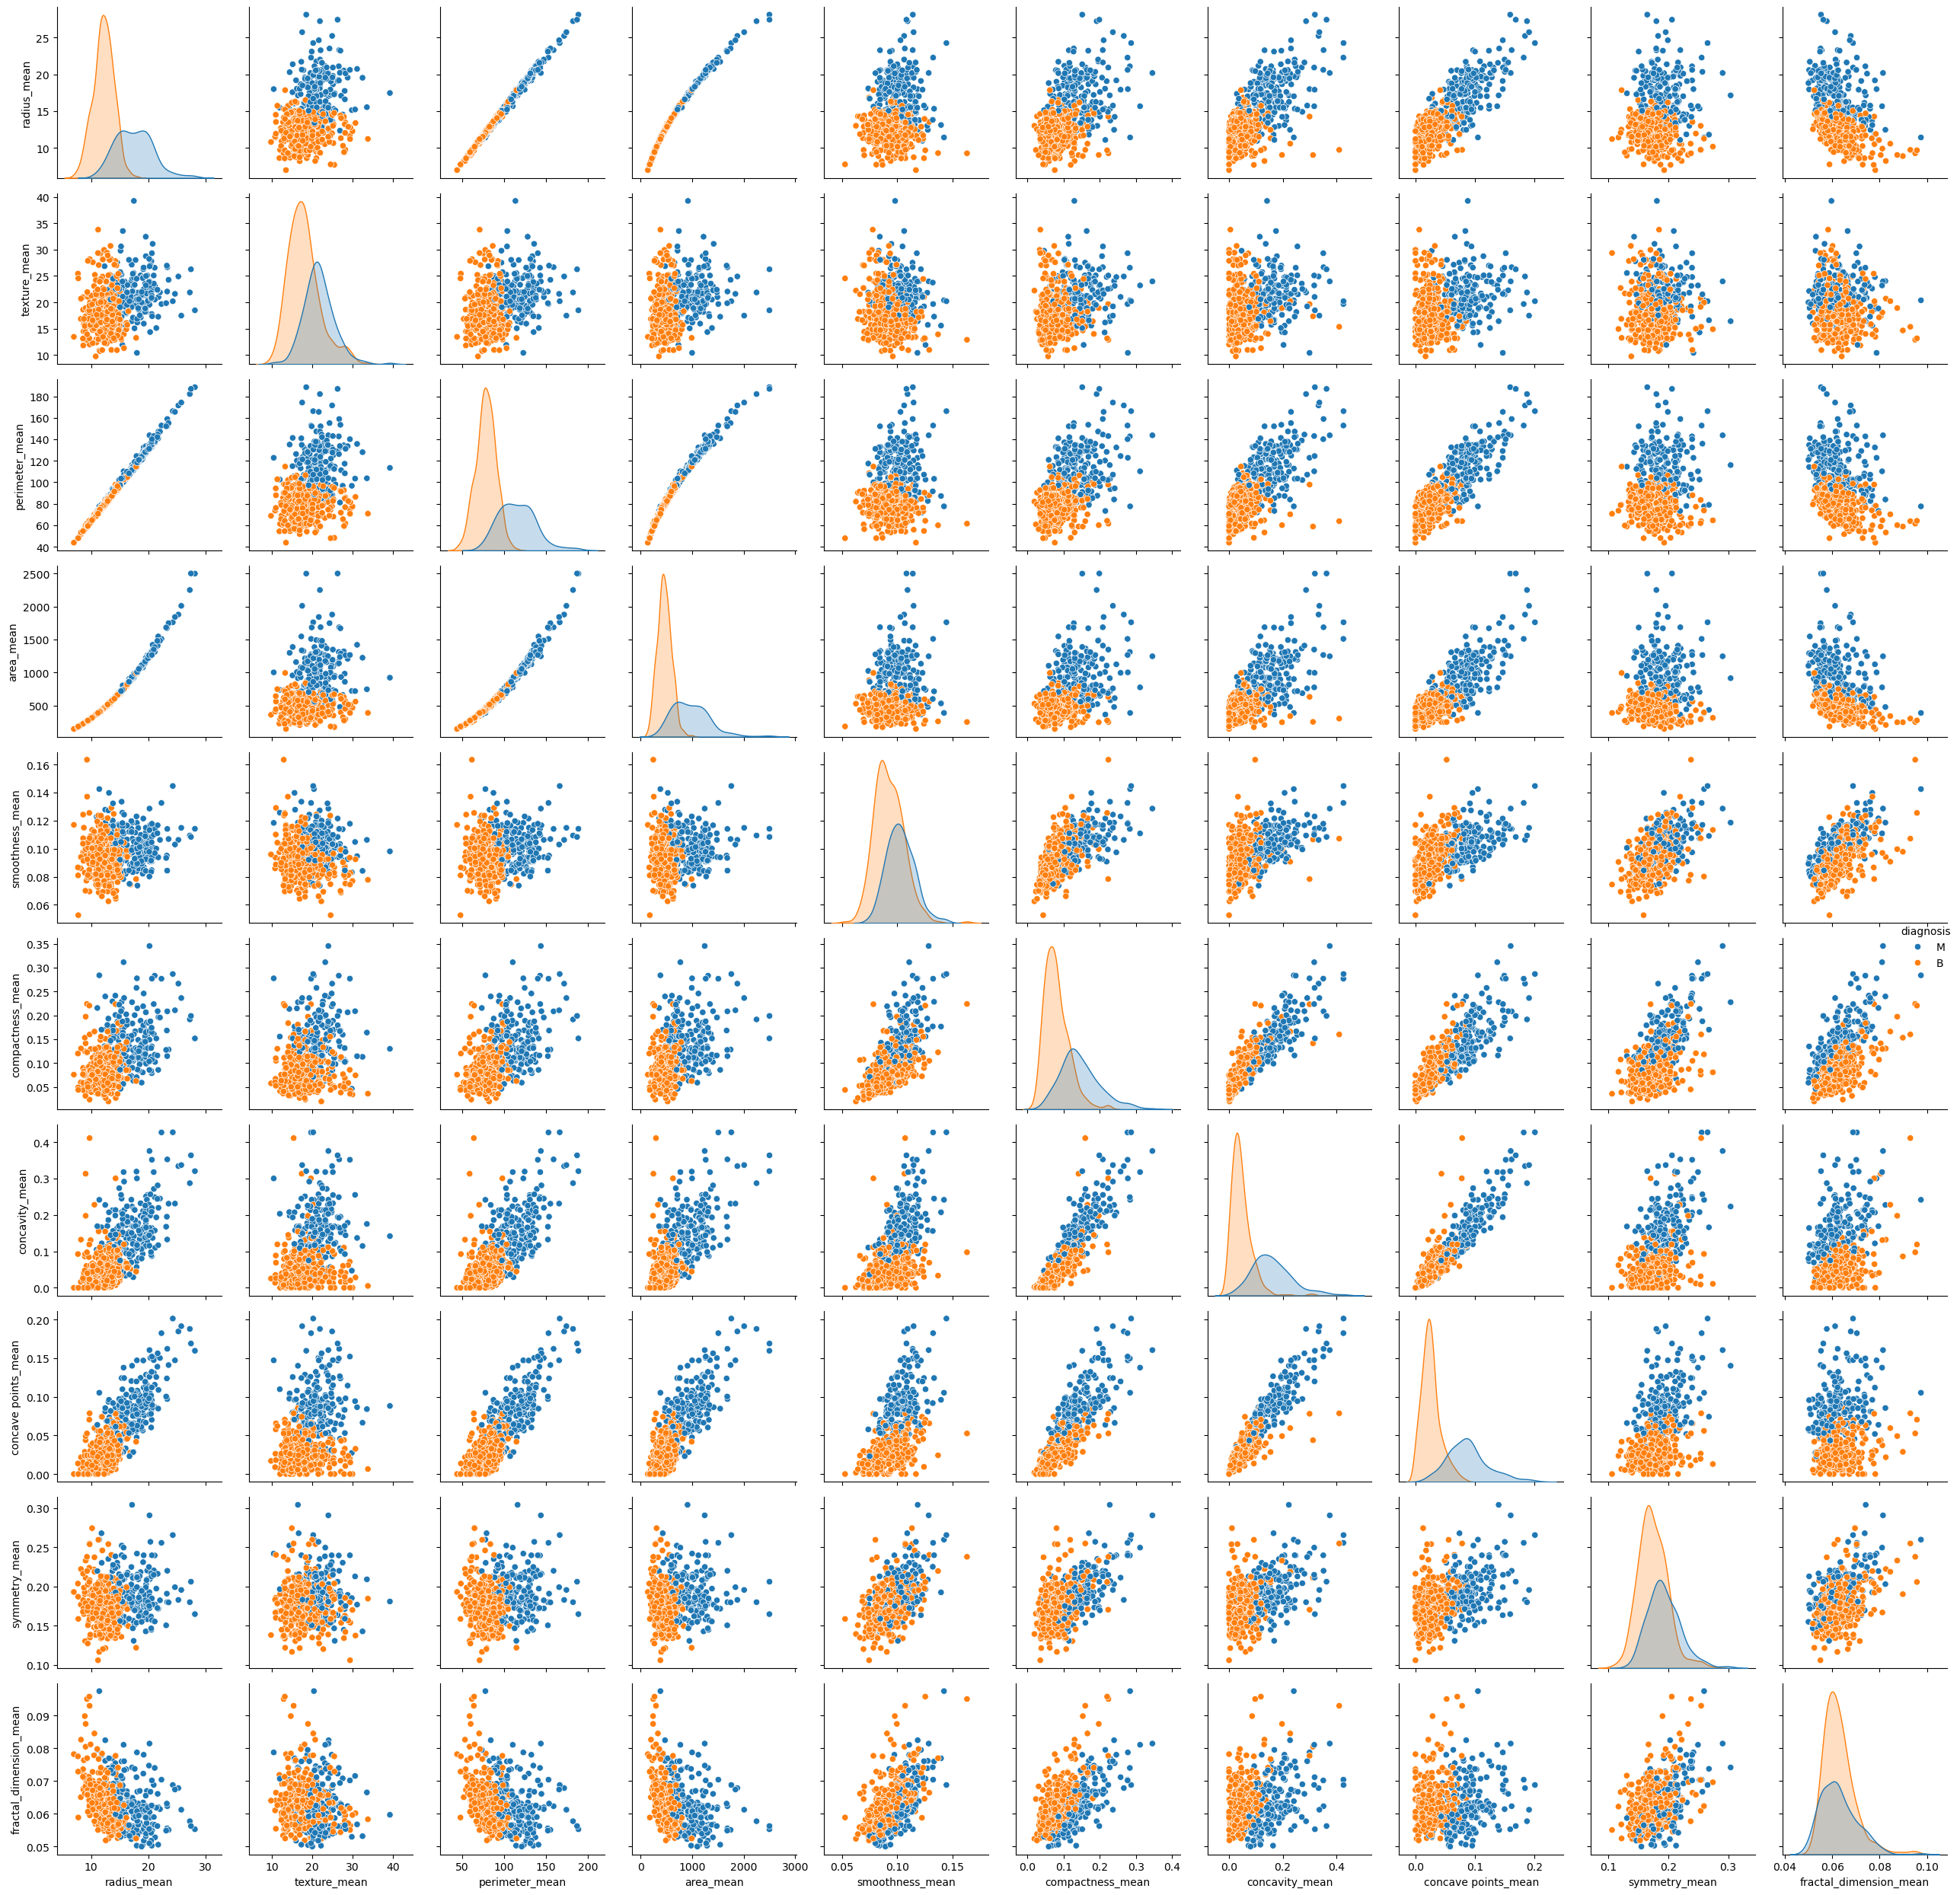

In [20]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
            'fractal_dimension_mean']
sns.pairplot(dataframe1[features + ['diagnosis']], hue='diagnosis')
plt.tight_layout()
plt.savefig('scatter_plot.png', dpi = 300)
plt.show()
end_time = time.time()

####  From above visuals below points can be concluded.

- There is a very strong positive correlation between radius_mean, perimeter_mean and area_mean. This is expected, as these features are directly related to the dimension.
- There is a strong positive correlation between concavity_mean and concave points_mean.
- texture_mean has a moderate positive correlation with compactness_mean and concavity_mean.
- smoothness_mean has a moderate positive correlation with compactness_mean, concavity_mean and concave points_mean.
- symmetry_mean and fractal_dimension_mean show relatively weak correlations with the other features.
- There seems to be a weak negative correlation between fractal_dimension_mean and radius_mean, perimeter_mean and area_mean.
- There are significant outliers, especially in the variables area_mean, perimeter_mean and radius_mean.
- Some variables (e.g. smoothness_mean, symmetry_mean) show more symmetric distributions, while others (e.g. concavity_mean, area_mean) show more skewed distributions.

#### 11.3 The code defines a function called ( plot_distributions)  that creates a grid of histograms to visualize the distributions of all columns in a DataFrame.

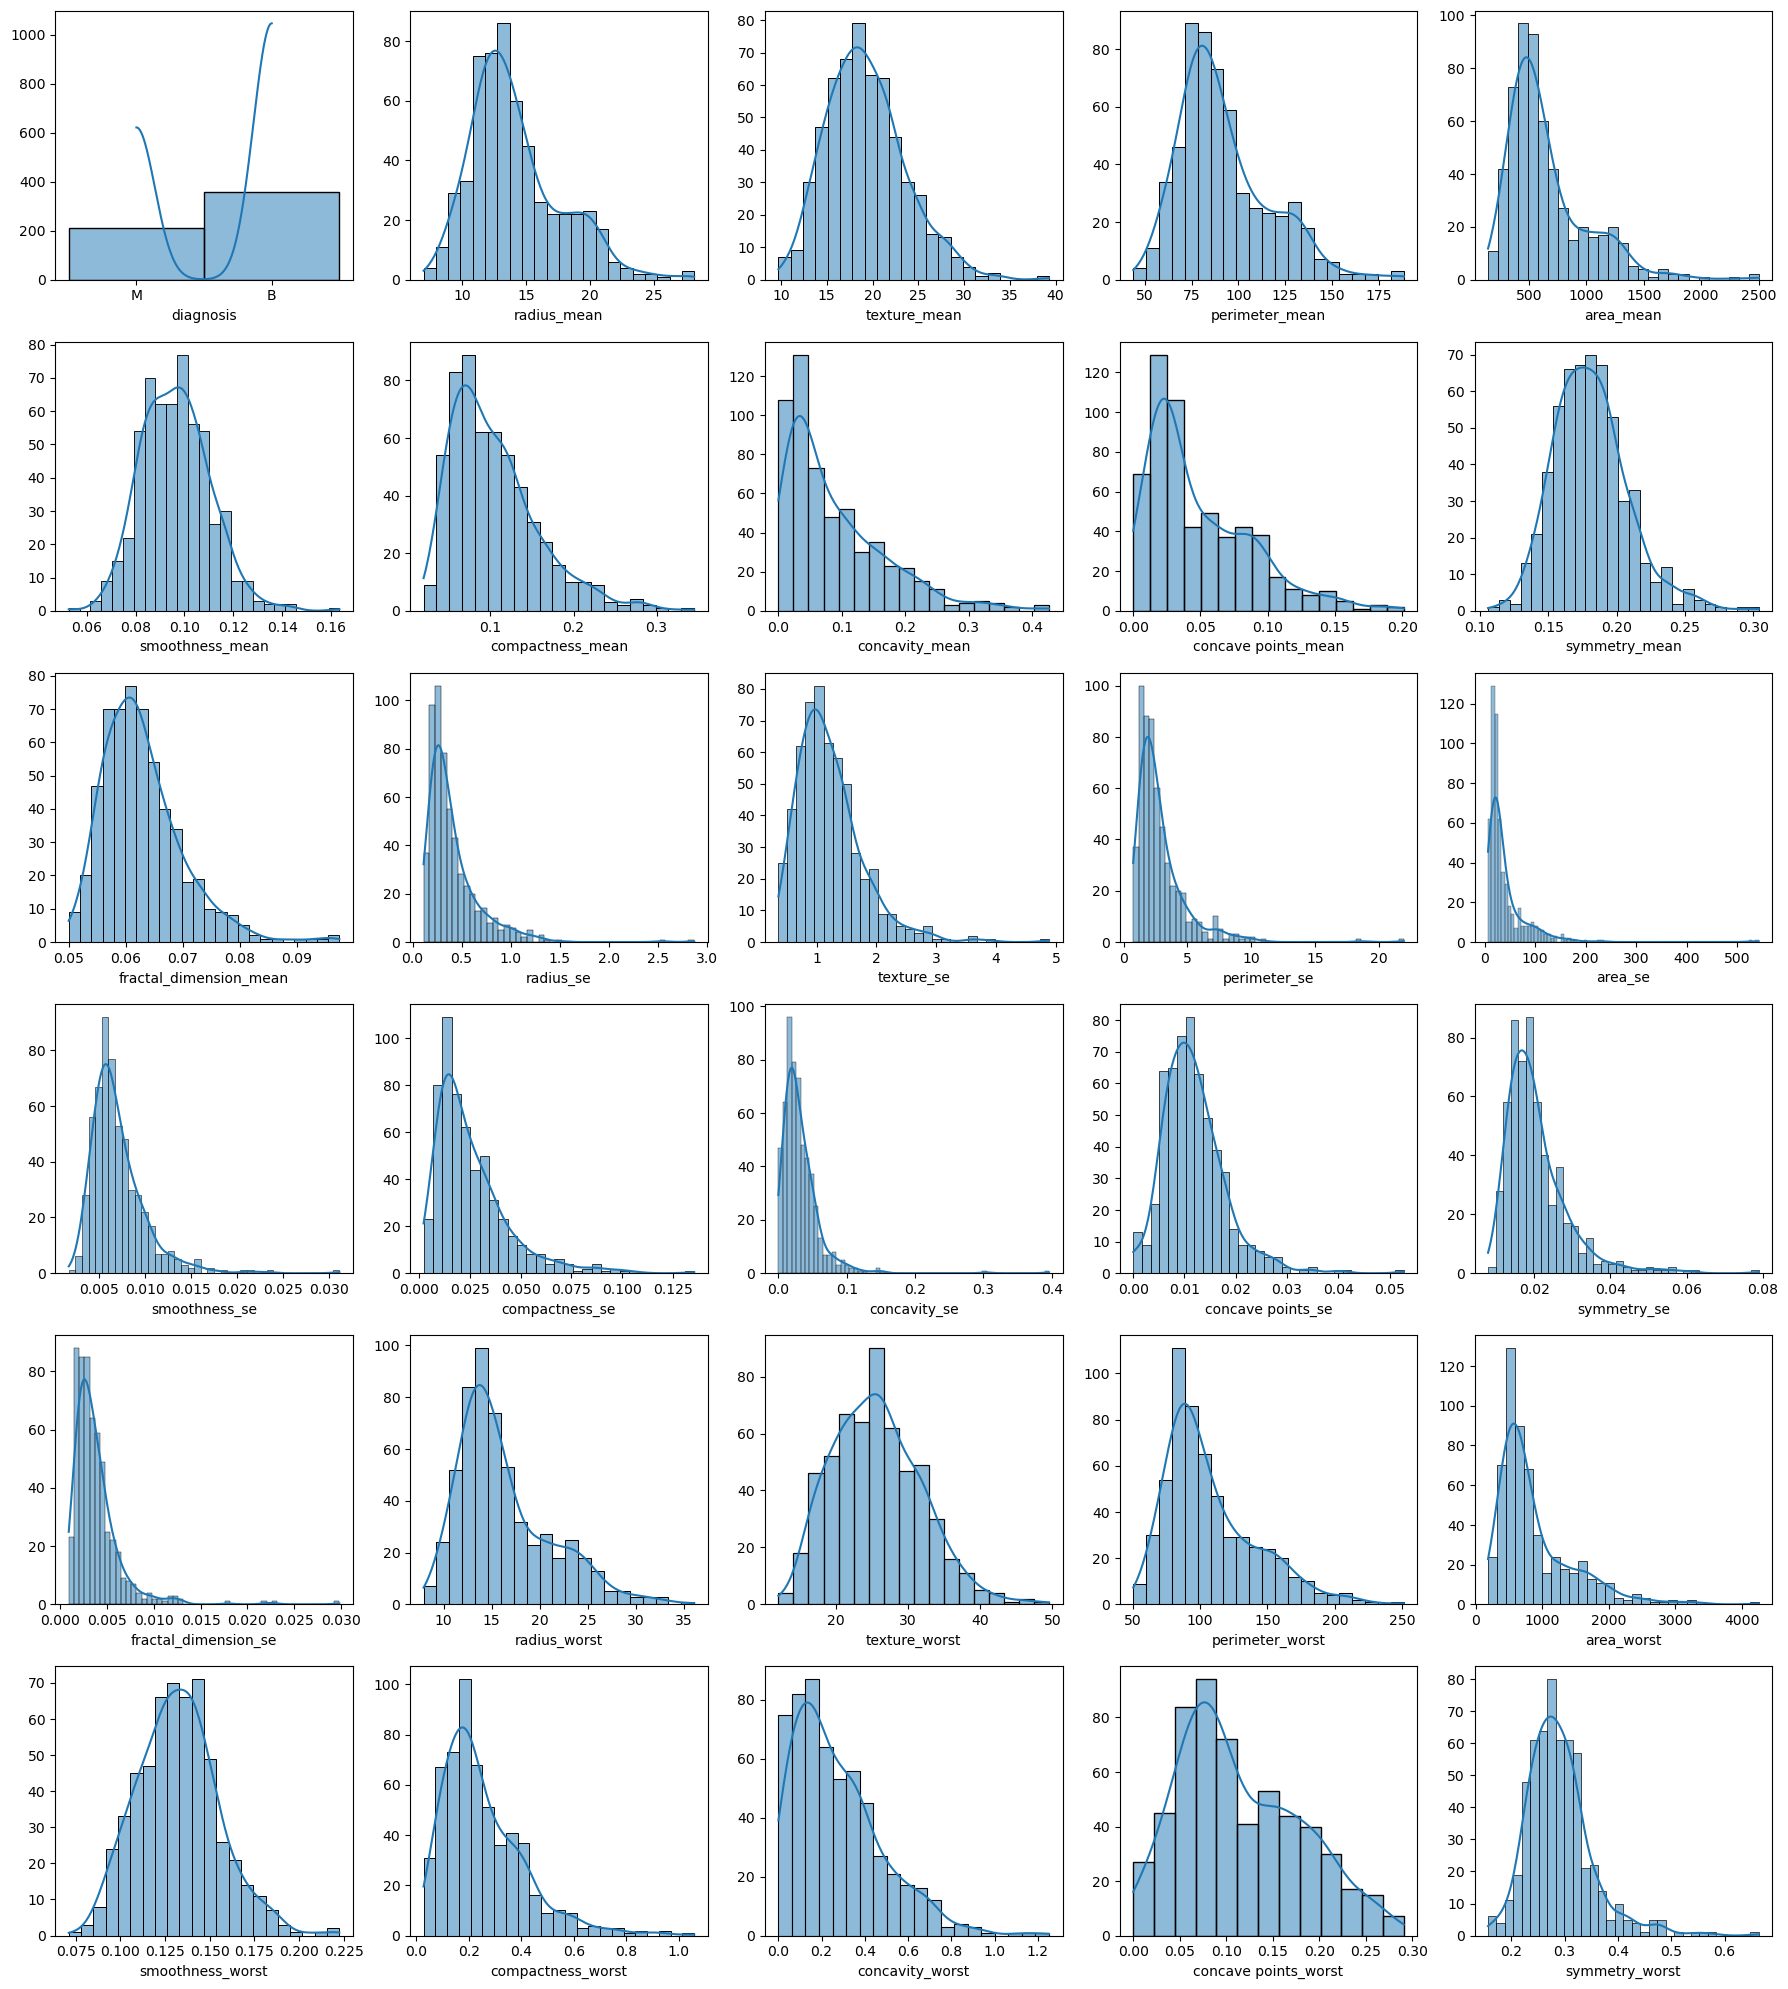

In [21]:
def plot_distributions(dataframe1, n_cols=5, n_rows=6, figsize=(18, 20)):
    n_plots = n_cols * n_rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, (column, ax) in enumerate(zip(dataframe1.columns, axes)):
        if i < n_plots:
            sns.histplot(dataframe1[column], kde=True, ax=ax)
            ax.set_xlabel(column)
            ax.set_ylabel('')
        else:
            fig.delaxes(ax)

    plt.tight_layout()
    plt.savefig('plot_distributions.png', dpi = 300)
    plt.show()

plot_distributions(dataframe1)

- Dimension features (radius_mean, perimeter_mean, area_mean): These features show similar, right-skewed distributions. This suggests a strong positive correlation between them.
- Texture features (texture_mean, smoothness_mean): They show more symmetric distributions, suggesting weaker correlations with other features.
- Shape features (compactness_mean, concavity_mean, concave points_mean): They show similar, right-skewed distributions. There may be moderate to strong positive correlations between these features.
- Symmetry_mean and fractal_dimension_mean: They show more symmetric distributions, there may be weaker correlations with other features.
- They show mostly right-skewed distributions. Their correlations with the main traits may be variable.

General comments:

- Strong positive correlation between dimension features (radius, perimeter, area)
- Shape features (compactness, concavity, concave points) may also have moderate to strong positive correlations.
- Texture, smoothness, symmetry and fractal dimension features may show weaker correlations with the others.

#### 11.4 Below code generates a correlation matrix heatmap that visualizes the strength and direction of relationships between numeric features in a DataFrame. 

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

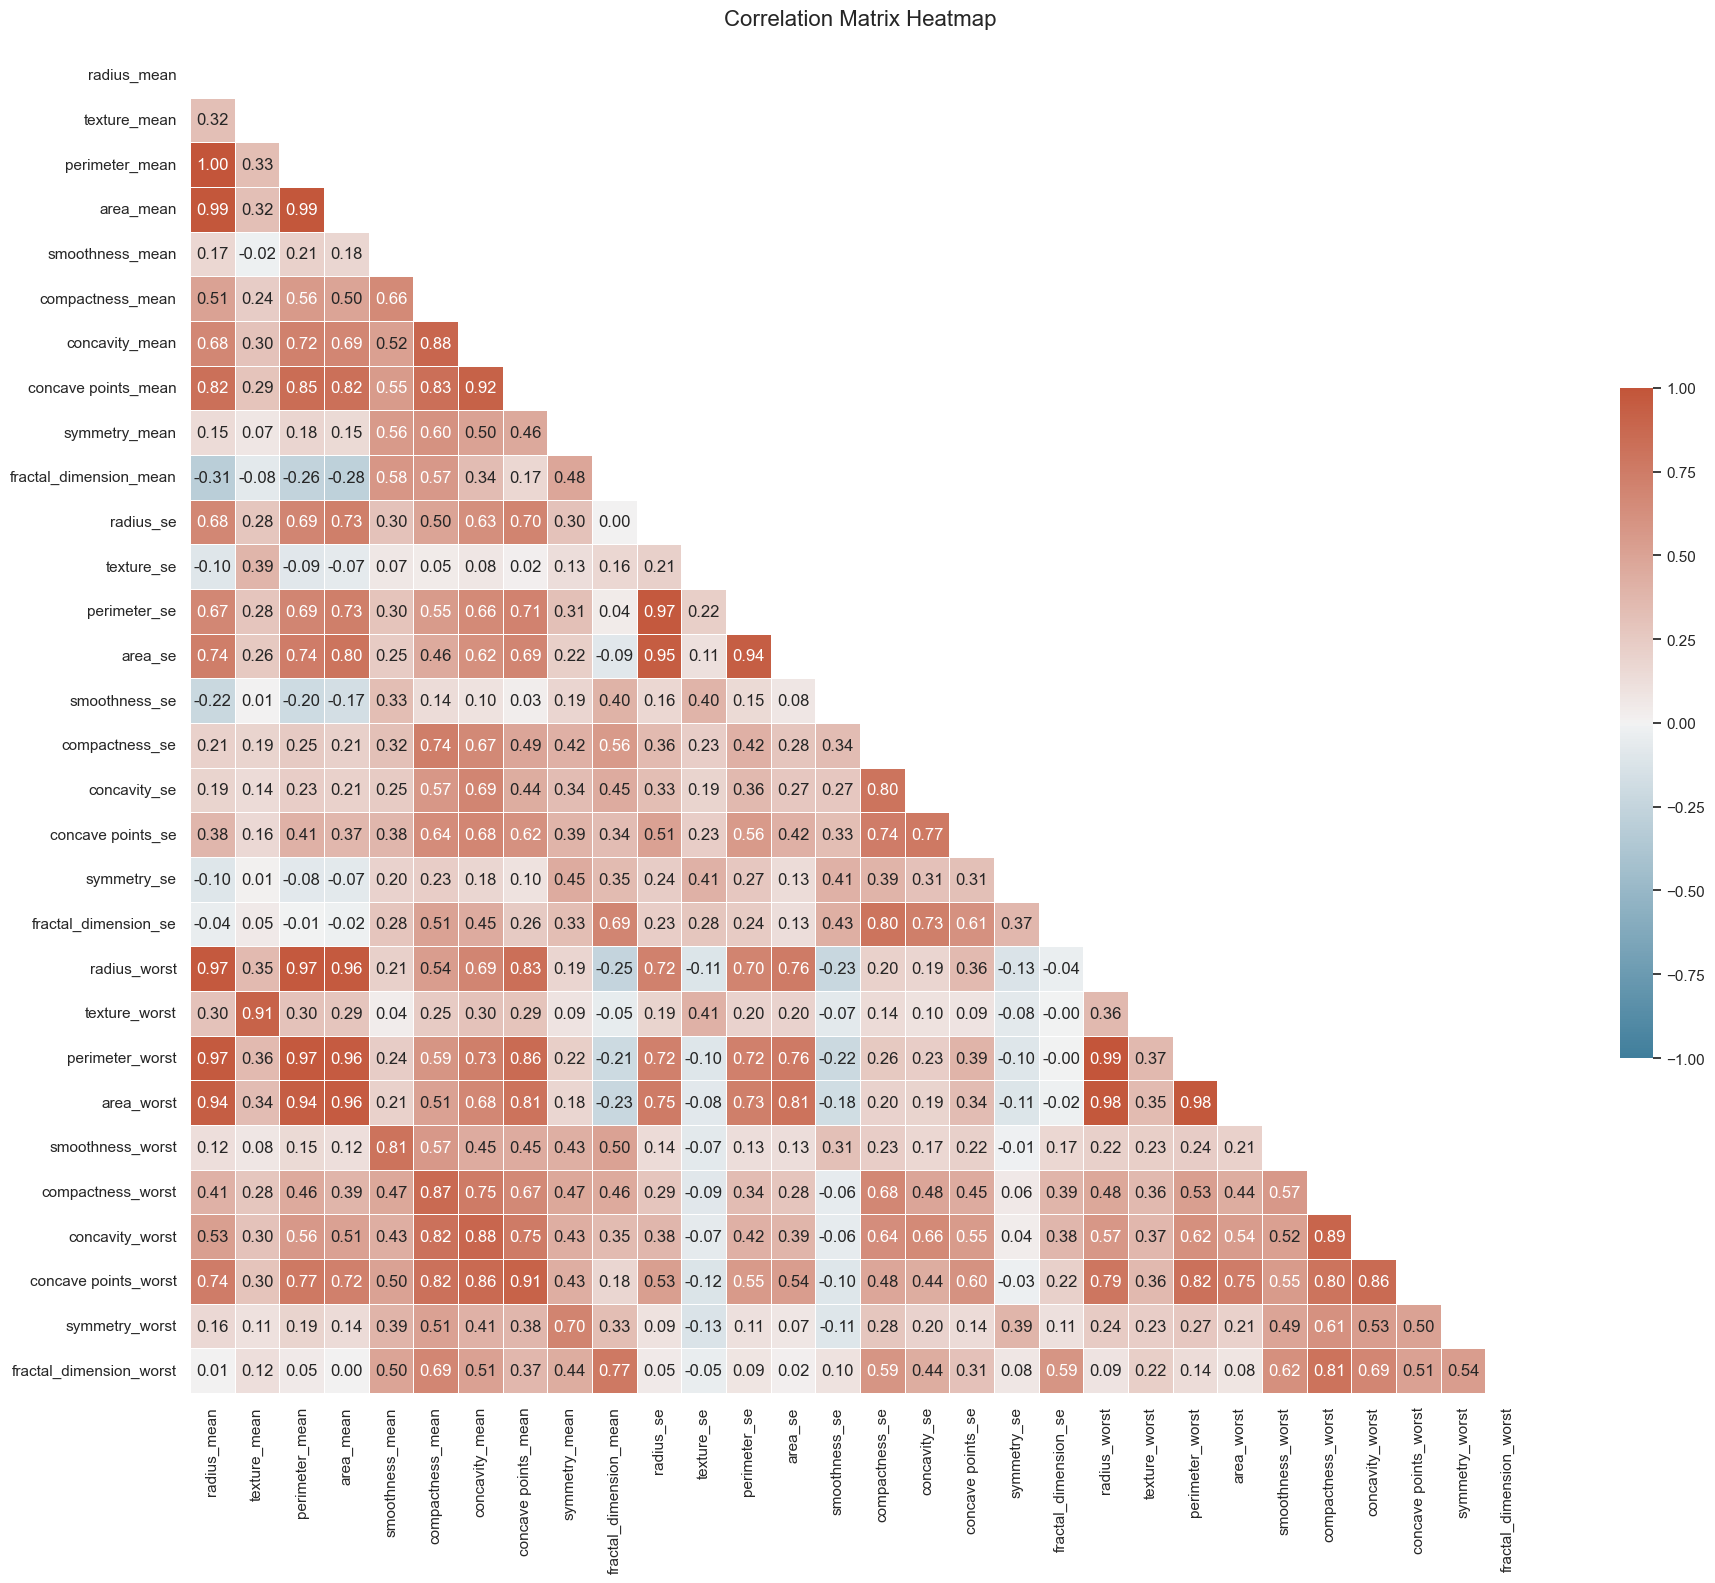

In [22]:
print(dataframe1.dtypes)

# Select numeric columns
numeric_columns = dataframe1.select_dtypes(include=[np.number]).columns
df_numeric = dataframe1[numeric_columns]

# Correlation Matrix
corr = df_numeric.corr()

plt.figure(figsize=(20,16))
sns.set(style='white')

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
           mask=mask,
           cmap=cmap,
           vmax=1,
           vmin=-1,
           center=0,
           square=True,
           linewidths=.5,
           cbar_kws={'shrink': .5},
           annot=True,
           fmt='.2f')

plt.title('Correlation Matrix Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix_heatmap.png', dpi=300)
plt.show()

In [23]:
def remove_highly_correlated_features(dataframe1, threshold=0.92):
    
    # Calculate the correlation matrix and take its absolute values
    corr_matrix = df_numeric.corr().abs()
    
    # Create upper triangle mask
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Mask the upper triangle to get only the lower triangle
    tri_df = corr_matrix.mask(mask)
    
    # Find columns with correlations exceeding the threshold value
    to_drop = [col for col in tri_df.columns if any(tri_df[col] > threshold)]
    
    # Remove highly correlated columns
    df_reduced = dataframe1.drop(to_drop, axis=1)
    
    print(f"The original DataFrame had {dataframe1.shape[1]} columns.")
    print(f"Reduced DataFrame has {df_reduced.shape[1]} column.")
    print(f"Number of columns removed: {len(to_drop)}")
    
    return df_reduced

In [24]:
df_reduced = remove_highly_correlated_features(dataframe1)

The original DataFrame had 31 columns.
Reduced DataFrame has 23 column.
Number of columns removed: 8


In [25]:
df_reduced.head()

diagnosis  texture_mean  smoothness_mean  compactness_mean  \
0         M         10.38          0.11840           0.27760   
1         M         17.77          0.08474           0.07864   
2         M         21.25          0.10960           0.15990   
3         M         20.38          0.14250           0.28390   
4         M         14.34          0.10030           0.13280   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0              0.14710         0.2419                 0.07871      0.9053   
1              0.07017         0.1812                 0.05667      0.7339   
2              0.12790         0.2069                 0.05999      0.7869   
3              0.10520         0.2597                 0.09744      1.1560   
4              0.10430         0.1809                 0.05883      0.7813   

   area_se  smoothness_se  ...  symmetry_se  fractal_dimension_se  \
0   153.40       0.006399  ...      0.03003              0.006193   
1    74.08       0.005225  ...      0.01389              0.003532   
2    94.03       0.006150  ...      0.02250              0.004571   
3    27.23       0.009110  ...      0.05963              0.009208   
4    94.44       0.011490  ...      0.01756              0.005115   

   texture_worst  area_worst  smoothness_worst  compactness_worst  \
0          17.33      2019.0            0.1622             0.6656   
1          23.41      1956.0            0.1238             0.1866   
2          25.53      1709.0            0.1444             0.4245   
3          26.50       567.7            0.2098             0.8663   
4          16.67      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 23 columns]

#### Outlier Detection

In [26]:
def mod_outliers(df_reduced, factor=1.5):
    
    # Select the numeric columns
    numeric_cols = df_reduced.select_dtypes(include=[np.number]).columns
    
    # Calculate the IQR
    Q1 = df_reduced[numeric_cols].quantile(0.25)
    Q3 = df_reduced[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper limits
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Limit outliers
    df_clipped = df_reduced.copy()
    for col in numeric_cols:
        df_clipped[col] = df_clipped[col].clip(lower_bound[col], upper_bound[col])
    
    print(f"Outliers {factor} * was delimited using the IQR factor")
    print(f"Number of columns processed: {len(numeric_cols)}")
    
    return df_clipped

# Use Function
df_cleaned = mod_outliers(df_reduced)

Outliers 1.5 * was delimited using the IQR factor
Number of columns processed: 22


####  The   (  dataframe2 = df_cleaned.copy() )  code is used to create a duplicate of df_cleaned, allowing you to perform operations on the new DataFrame while keeping the original DataFrame intact.

In [27]:
dataframe2 = df_cleaned.copy()

In [28]:
dataframe2.head()

diagnosis  texture_mean  smoothness_mean  compactness_mean  \
0         M         10.38         0.118400           0.22862   
1         M         17.77         0.084740           0.07864   
2         M         21.25         0.109600           0.15990   
3         M         20.38         0.133695           0.22862   
4         M         14.34         0.100300           0.13280   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0              0.14710         0.2419                 0.07871      0.9053   
1              0.07017         0.1812                 0.05667      0.7339   
2              0.12790         0.2069                 0.05999      0.7869   
3              0.10520         0.2464                 0.07875      1.1560   
4              0.10430         0.1809                 0.05883      0.7813   

   area_se  smoothness_se  ...  symmetry_se  fractal_dimension_se  \
0    86.20       0.006399  ...      0.03003              0.006193   
1    74.08       0.005225  ...      0.01389              0.003532   
2    86.20       0.006150  ...      0.02250              0.004571   
3    27.23       0.009110  ...      0.03596              0.008023   
4    86.20       0.011490  ...      0.01756              0.005115   

   texture_worst  area_worst  smoothness_worst  compactness_worst  \
0          17.33     1937.05            0.1622            0.62695   
1          23.41     1937.05            0.1238            0.18660   
2          25.53     1709.00            0.1444            0.42450   
3          26.50      567.70            0.1901            0.62695   
4          16.67     1575.00            0.1374            0.20500   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654         0.41915   
1           0.2416                0.1860         0.27500   
2           0.4504                0.2430         0.36130   
3           0.6869                0.2575         0.41915   
4           0.4000                0.1625         0.23640   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.12301  
4                  0.07678  

[5 rows x 23 columns]

#### Below code Perfomes below task:

Data Separation: Extracts the target variable and features.

Data Splitting: Divides the data into training and testing sets.

Feature Scaling: Standardizes features to have a mean of 0 and a standard deviation of 1, which helps many machine learning algorithms perform better.

In [29]:
y = dataframe2['diagnosis']
X = dataframe2.drop('diagnosis', axis = 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## ML Model Initialization

### Logistic regression

#### Below code is used to ML Model Initialization and  Creates a logistic regression model.

#### Training: Fit the model to the training data to learn how to classify new data based on the features.

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

####  lr.predict(X_test): Uses the trained logistic regression model to predict class labels for the test set features.

#### y_pred_lr: Stores these predicted labels, which can be used to evaluate the model’s performance against the true labels from the test set.

In [33]:
y_pred_lr = lr.predict(X_test)

In [34]:
print('Logistic Regression Accuracy Score on X_train =', accuracy_score(y_train, lr.predict(X_train)))
print('Logistic Regression Accuracy Score on X_test =',accuracy_score(y_test, lr.predict(X_test)))

Logistic Regression Accuracy Score on X_train = 0.989010989010989
Logistic Regression Accuracy Score on X_test = 0.9736842105263158


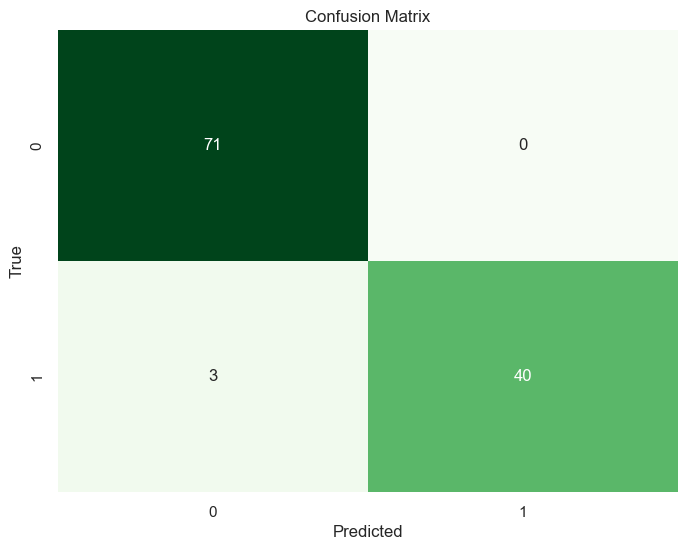

In [35]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, cmap='Greens', fmt='g', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [36]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        71
           M       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [42]:
### Permannet code upto here

In [51]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming dataframe2 is already loaded with your data
# Define the features and target
y = dataframe2['diagnosis']
X = dataframe2.drop('diagnosis', axis=1)

# Get the feature names for prediction later
features = X.columns.tolist()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform instead of fit_transform

# Initialize and train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict using the trained model
y_pred_lr = lr.predict(X_test)

# Print the classification report to evaluate the model
print(classification_report(y_test, y_pred_lr))

# Define the prediction function
def predict_cancer(model, scaler, input_data):
    """
    Predicts whether the given input data is Benign (B) or Malignant (M).
    
    Parameters:
    - model: Trained logistic regression model
    - scaler: Fitted scaler used for feature scaling
    - input_data: A tuple or list containing feature values
    
    Returns:
    - str: Prediction ('B' or 'M')
    """
    
    # Convert input data to DataFrame with the same feature names
    df_input = pd.DataFrame([input_data], columns=features)
    
    # Scale the input data
    df_input_scaled = scaler.transform(df_input)
    
    # Make prediction
    prediction = model.predict(df_input_scaled)
    
    # Return the prediction ('B' or 'M')
    return prediction[0]

# Example usage of the function with an input tuple matching the model's expected features
input_data = [10.38, 0.118400, 0.22862, 0.14710, 0.2419, 0.07871, 0.9053, 86.20, 
               0.006399, 0.03003, 0.006193, 17.33, 1937.05, 0.1622, 0.62695, 0.7119, 
               0.2654, 0.41915, 0.11890, 0.20500, 0.4000, 0.1625]  # Ensure this matches the feature order

# Predict and print the result
print(predict_cancer(lr, scaler, input_data))


              precision    recall  f1-score   support

           B       0.99      1.00      0.99        71
           M       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

B


In [56]:
# Define the prediction function
def predict_cancer(model, scaler, input_data):
    """
    Predicts whether the given input data is Benign (B) or Malignant (M).
    
    Parameters:
    - model: Trained logistic regression model
    - scaler: Fitted scaler used for feature scaling
    - input_data: A tuple or list containing feature values
    
    Returns:
    - str: Prediction ('B' or 'M')
    """
    
    # Convert input data to DataFrame
    df_input = pd.DataFrame([input_data], columns=features)
    
    # Preprocess input data (e.g., scaling)
    df_input_scaled = scaler.transform(df_input)
    
    # Make prediction
    prediction = model.predict(df_input_scaled)
    
    # Map prediction to class labels
    return 'B' if prediction[0] == 'B' else 'M'

# Example usage:
input_data = [10.38, 0.118400, 0.22862, 0.14710, 0.2419, 0.07871, 0.9053, 86.20, 
               0.006399, 0.03003, 0.006193, 17.33, 1937.05, 0.1622, 0.62695, 0.7119, 
               0.2654, 0.41915, 0.11890 ,0.20500 ,0.4000 ,0.1625 ]  # Example input data
print(predict_cancer(lr, scaler, input_data))

B


### KNN (K Neighbors)

In [57]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred_knn = knn.predict(X_test)

In [59]:
print(y_pred_knn)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M']


In [60]:
print('KNN Accuracy Score on X_train =', accuracy_score(y_train, knn.predict(X_train)))
print('KNN Accuracy Score on X_test =',accuracy_score(y_test, knn.predict(X_test)))

KNN Accuracy Score on X_train = 0.978021978021978
KNN Accuracy Score on X_test = 0.9385964912280702


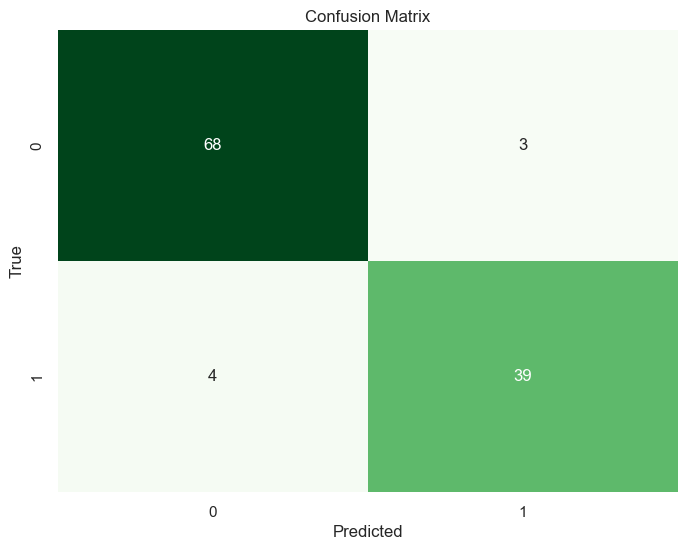

In [61]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, cmap='Greens', fmt='g', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [62]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           B       0.94      0.96      0.95        71
           M       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## SVC (Support Vector Classifier)

gamma

gamma is a parameter for the rbf, poly and sigmoid kernel functions.
gamma determines the effect of each training sample. Low gamma values mean that the effect of each training sample is spread over a wider area. High gamma values mean that each sample has an effect in a narrower area.
Small gamma values create a flatter decision boundary, while large gamma values create a more complex and flexible decision boundary.

    C:

C is a regularization parameter that controls the error term.
A large C value means less flexibility for the correct classification of each sample in the training data. The model becomes more complex when trying to reduce errors in the training data.
A small C value allows the model to be more flexible and allow for some errors in the training data. This can help prevent overlearning (overfitting).
    
    kernel

kernel determines the type of function SVM uses to transform data points.
'linear': Uses a linear kernel, meaning the data is considered linearly separable.
'poly': Uses a polynomial kernel. This kernel provides non-linear separability by transforming the data into a polynomial space of higher degree.
'rbf': Uses a radial basis function (RBF) kernel. This is often the most popular and powerful type of kernel. It transforms the data using a Gaussian-type function.
'sigmoid': Uses the sigmoid kernel. This kernel transforms the data in a similar way to the activation function used in artificial neural networks.
    
    degree:

degree determines the degree of the polynomial when using a polynomial kernel (poly).
degree controls the complexity of the polynomial kernel. Higher degree means a more complex model.
    
    coef0:

coef0 is a free parameter for polynomial and sigmoid kernel functions.
coef0 is a constant that changes the effect of the kernel function. In the polynomial kernel, it is used together with the degree of the polynomial to adjust the flexibility and complexity of the model.
In the sigmoid kernel, it is used to adjust the balance between linear and sigmoid functions.

In [64]:
svc = SVC()
parameters = {  
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5] 
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'coef0': [0.0, 0.1, 0.5], 'degree': [2, 3, 4],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [65]:
grid_search.best_params_

{'C': 15, 'coef0': 0.5, 'degree': 4, 'gamma': 0.01, 'kernel': 'poly'}

In [66]:
grid_search.best_score_

0.9846153846153847

In [67]:
svcx = SVC()
parameters = {
    'C': 15,
    'coef0': 0.5,
    'degree': 4,
    'gamma': 0.01,
    'kernel': 'poly'
}

svcx.fit(X_train, y_train)

SVC()

In [68]:
y_pred_svc = svcx.predict(X_test)

In [69]:
print('SVC Accuracy Score on X_train =', accuracy_score(y_train, svcx.predict(X_train)))
print('SVC Accuracy Score on X_test =', accuracy_score(y_test, svcx.predict(X_test)))

SVC Accuracy Score on X_train = 0.9868131868131869
SVC Accuracy Score on X_test = 0.9473684210526315


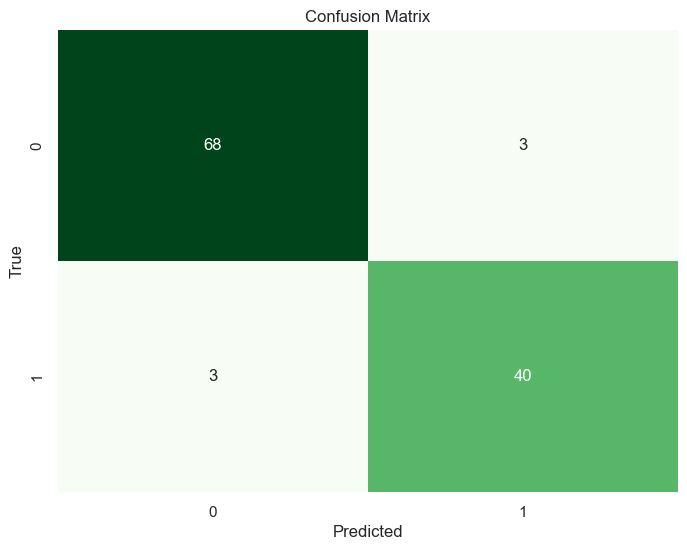

In [72]:
cm_svc = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(8,6))
sns.heatmap(cm_svc, annot=True, cmap='Greens', fmt='g', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [71]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

